# TwnsorFlow Learning

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from subprocess import check_output

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
print(check_output(["ls", "./input"]).decode("utf8"))

predict.csv
sample_submission.csv
test.csv
train.csv



In [3]:
train=pd.read_csv('./input/train.csv')
test=pd.read_csv('./input/test.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_val=train.iloc[:,1:]
Y=train['label']
X_val=X_val/255
X_train,X_test,Y_train,Y_test=train_test_split(X_val,Y,test_size=0.33)


In [6]:
X_train.describe()
X_train=X_train.values
Y_train=Y_train.values
X_test=X_test.values
Y_test=Y_test.values;
print(X_train)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [7]:
#Y=tf.one_hot(Y,depth=10)
#Y=Y.values
print(Y_train)

[5 1 1 ..., 6 6 7]


In [8]:
'''
with tf.Session() as sess:
    Y=sess.run(Y)
    print(Y)
    sess.close()
'''

'\nwith tf.Session() as sess:\n    Y=sess.run(Y)\n    print(Y)\n    sess.close()\n'

In [9]:
# Parameters
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_hidden_3=256
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [10]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': X_train}, y=Y_train.T,
    batch_size=batch_size, num_epochs=None, shuffle=True)

In [11]:
# Define the neural network
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

In [12]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [13]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/rw/v1q8wh6j7k328nnrrr1m3fyh0000gn/T/tmpd9pvjtml', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11887c2b0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
# Train the Model
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/rw/v1q8wh6j7k328nnrrr1m3fyh0000gn/T/tmpd9pvjtml/model.ckpt.
INFO:tensorflow:loss = 2.51323723158, step = 1
INFO:tensorflow:global_step/sec: 68.0229
INFO:tensorflow:loss = 0.419678149241, step = 101 (1.471 sec)
INFO:tensorflow:global_step/sec: 69.774
INFO:tensorflow:loss = 0.28596288624, step = 201 (1.433 sec)
INFO:tensorflow:global_step/sec: 61.0186
INFO:tensorflow:loss = 0.285070874218, step = 301 (1.639 sec)
INFO:tensorflow:global_step/sec: 52.9803
INFO:tensorflow:loss = 0.228422192359, step = 401 (1.891 sec)
INFO:tensorflow:global_step/sec: 64.9415
INFO:tensorflow:loss = 0.478851078655, step = 501 (1.536 sec)
INFO:tensorflow:global_step/sec: 64.1826
INFO:tensorflow:loss = 0.278815791153, step = 601 (1.558 sec)
INFO:tensorflow:global_step/sec: 63.9091
INFO:tensorflow:loss = 0.352807950436, step = 701 (1.564 sec)
INFO:tensorflow:global_step/sec: 58.1728
INFO:tensorflow:loss = 0.26220

In [15]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': X_test}, y=Y_test.T,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2017-11-28-05:49:15
INFO:tensorflow:Restoring parameters from /var/folders/rw/v1q8wh6j7k328nnrrr1m3fyh0000gn/T/tmpd9pvjtml/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-28-05:49:16
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.91241, global_step = 1000, loss = 0.297412


{'accuracy': 0.91240984, 'global_step': 1000, 'loss': 0.29741234}

INFO:tensorflow:Restoring parameters from /var/folders/rw/v1q8wh6j7k328nnrrr1m3fyh0000gn/T/tmpd9pvjtml/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /var/folders/rw/v1q8wh6j7k328nnrrr1m3fyh0000gn/T/tmpd9pvjtml/model.ckpt-1000


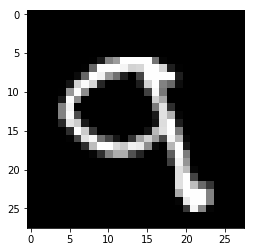

Model prediction: 9


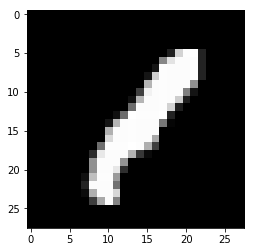

Model prediction: 1


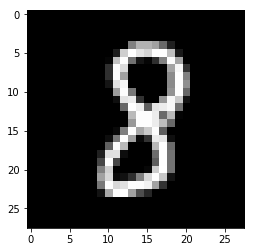

Model prediction: 8


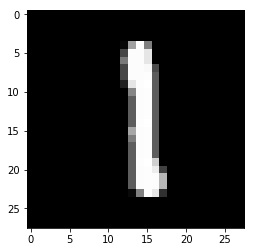

Model prediction: 1


In [17]:
# Predict single images
n_images = 4
# Get images from test set
test_images = X_test[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(X_test[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])